In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 1. Régression linéaire simple

### 1) Installez la bibliothèque sklearn

In [85]:
from sklearn.datasets import load_boston

### 2) Créez un notebook pour lire la base de données «Boston housing dataset » et générez un dataframe.

In [86]:
boston_dataset = load_boston()
boston_df = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

boston_df['MEDV'] = boston_dataset.target
boston_df

/home/leandro/miniconda3/envs/isd/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### Description des champs
 - **CRIM**     : per capita crime rate by town
 - **ZN**       : proportion of residential land zoned for lots over 25,000 sq.ft.
 - **INDUS**    : proportion of non-retail business acres per town
 - **CHAS**     : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - **NOX**      : nitric oxides concentration (parts per 10 million)
 - **RM**       : average number of rooms per dwelling
 - **AGE**      : proportion of owner-occupied units built prior to 1940
 - **DIS**      : weighted distances to five Boston employment centres
 - **RAD**      : index of accessibility to radial highways
 - **TAX**      : full-value property-tax rate per $10,000
 - **PTRATIO**  : pupil-teacher ratio by town
 - **B**        : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - **LSTAT**    : % lower status of the population. (education)
 - **MEDV**     : Median value of owner-occupied homes in $1000's

### 3) Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes). Générez un histogramme de la distribution de la variable dépendante.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


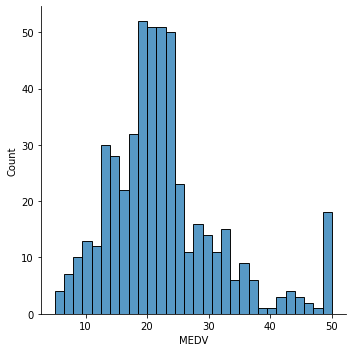

In [87]:
sns.displot(boston_df['MEDV'], bins=30)
boston_df.describe()

Certaines valeurs comme `PTRATIO` ou `LSTAT`, représentent un ratio sont multiplité par 100. Au lieu d'avoir 0.153 on a 15.3 par exemple. Cela peut poser un problème si on veut utiliser ces valeurs comme un scalaire.  
  
`CHAS` est un booléen, il ne faudrait pas la traiter comme une valeur continue.  

### 4) Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE. Commentez vos observations.

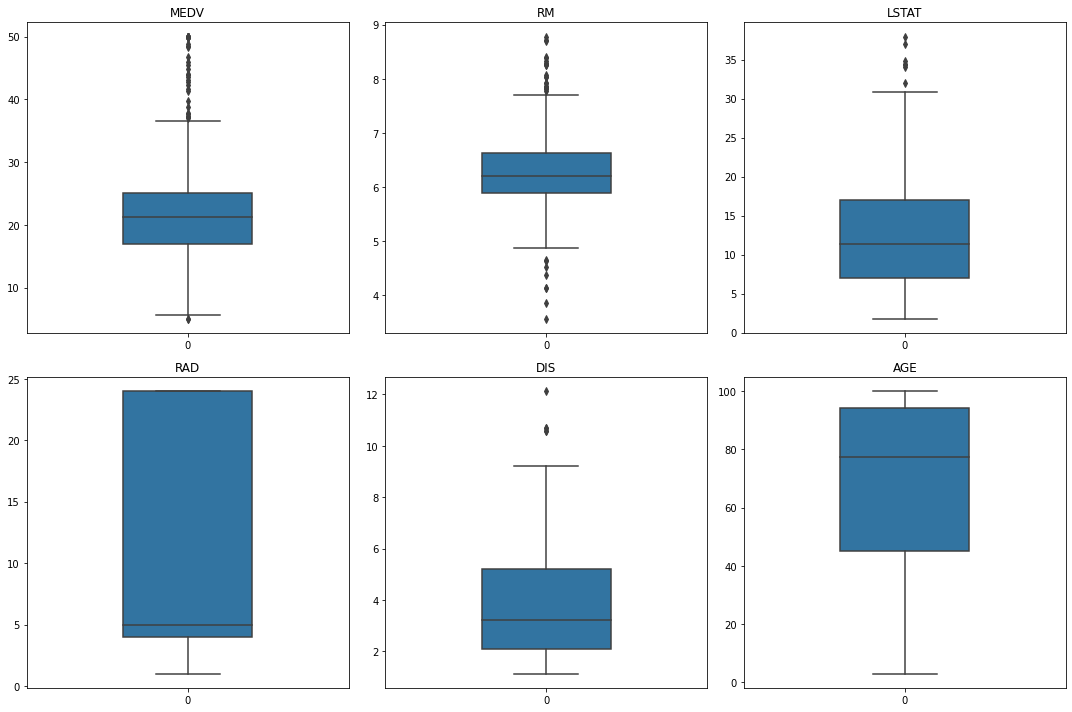

In [104]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
variables = ['MEDV', 'RM', 'LSTAT', 'RAD', 'DIS', 'AGE']
current_box = 0

for i in range(2):
    for j in range(3):
        ax[i][j].set_title(variables[current_box])
        sns.boxplot(data=boston_df[variables[current_box]], ax=ax[i][j], width=0.4)
        current_box += 1

plt.tight_layout()
plt.show()

- **MEDV** :
  Il y a beaucoup de valeurs aberrantes en dessus de 37, il s'agit probablement des riches qui ont des maisons qui coûtent très chères mais qui sont peu nombreux.

- **RM**
  La majorité des logements ont un nombre de pièce autour de 6 car la majorité des gens ont des maisons "classiques" Les outliers vers le haut sont probablement les riches avec des manoirs et les outliers du bas sont probablement les très pauvres.

- **LSTAT** :
  La majorité des quartiers sont mal éduqué à 20%. Les outliers du haut sont probablement des quartiers plus riches, avec une plus grande proportion de gens éduqué. Il est peut-être intéressant de corréler cette variable avec `PTRATIO`, car il s'agit du pourcentage d'enseignant pour les enfants.

- **RAD** :
  Il y a un gros creux de données entre 5 et ~24 et les données sont des entiers.

- **DIS** :
  Il y a une répartition unimodale étalée à droite pour la distance à un centre d'employement.

- **AGE** :
  Dès que les gens achètent des maisons avant 1940, ils ont tendance à habiter eux-même dedans plutôt que de faire de la location.

### 5) Créez des modèles en utilisant l’algorithme de régression linéaire simple vue en cours pour estimer la valeur MEDV à partir des variables RM, RAD et LSTAT, chaque fois utilisant seulement une des variables. Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer la performance moyenne du modèle. Commentez vos résultats.

In [89]:
import numpy as np
from random import randrange

def compute_MSE(b, m, data):
	totalError = 0   # Mean squared error formula
	
	for i in range (0, len(data)):
		x = data[i, 0] # variable indépendante
		y = data[i, 1] # variable dépendante
		totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
	return totalError/ float(len(data)) # on divise par N

def linear_determination_coeff(b, m, data):
	nominator = 0
	denominator = 0

	dependant_var = [y[1] for y in data]
	y_mean = sum(dependant_var) / len(dependant_var)
	
	for i in range (0, len(data)):
		x = data[i, 0] # variable indépendante
		y = data[i, 1] # variable dépendante

		nominator += (y-(m*x + b)) ** 2 # somme des différences au carré
		denominator += (y - y_mean) ** 2
	return 1 - nominator / denominator

def step_gradient(b_current, m_current, data, learning_rate):
	b_gradient = 0
	m_gradient = 0
	N = float(len(data))

	for i in range(0, len(data)):
		x = data[i, 0] # variable indépendante
		y = data[i, 1] # variable dépendante
		b_gradient += -(1/N) * (y - (m_current * x + b_current))
		m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
	new_b = b_current - (learning_rate * b_gradient)
	new_m = m_current - (learning_rate * m_gradient) 
	return [new_b, new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
	b = starting_b
	m = starting_m
	for i in range(num_epochs):
		b, m = step_gradient(b, m, np.array(data), learning_rate)
		#print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i + 1, b, m, compute_MSE(b, m, data)))
	return [b, m]

# Split a dataset into a train and test set
def train_test_split(dataset, split=0.60):
	train = list()
	train_size = split * len(dataset)
	dataset_copy = list(dataset)
	while len(train) < train_size:
		index = randrange(len(dataset_copy))
		train.append(dataset_copy.pop(index))
	return train, dataset_copy


In [90]:
# Hyper-parameters
learning_rate = {'RM': 0.047, 'RAD': 0.01, 'LSTAT' : 0.008}
num_epochs = {'RM': 2000, 'RAD': 1000, 'LSTAT' : 3000}
num_iterations = 5
single_vars = ['RM', 'RAD', 'LSTAT']
results_single = pd.DataFrame(columns=['independant var', 'b', 'm', 'MSE', 'R2'])

for col_name in single_vars:
	print(f"\n[{col_name}] Starting gradient descent with {num_epochs[col_name]} epochs and learning rate = {learning_rate[col_name]}")
	
	# Select data
	data = boston_df[[col_name, 'MEDV']].values

	for i in range(num_iterations):
		# Split the dataset
		train_set, test_set = train_test_split(data, 0.80)
		train_set = np.array(train_set)
		test_set = np.array(test_set)

		# Init b and m
		b = np.random.rand(1)  # intercept
		m = np.random.rand(1)  # pente

		# Gradient descent
		[b, m] = gradient_descent(train_set, b, m, learning_rate[col_name], num_epochs[col_name])

		# Compute and store results
		mse = compute_MSE(b, m, test_set)
		r2 = linear_determination_coeff(b, m, test_set)
		print(f"\titeration {i + 1}/{num_iterations}, b = {b}, m = {m}, MSE = {mse}, R2 = {r2}")
		results_single.loc[len(results_single)] = [col_name, b, m, mse, r2]



[RM] Starting gradient descent with 2000 epochs and learning rate = 0.047
	iteration 1/5, b = [-25.66961176], m = [7.69480861], MSE = [55.28042262], R2 = [0.25874197]
	iteration 2/5, b = [-22.6718838], m = [7.2415617], MSE = [37.09624194], R2 = [0.48787614]
	iteration 3/5, b = [-21.71261935], m = [7.07427128], MSE = [39.28388862], R2 = [0.53665002]
	iteration 4/5, b = [-23.8649466], m = [7.37024797], MSE = [68.62997206], R2 = [0.33877607]
	iteration 5/5, b = [-23.46033192], m = [7.30492658], MSE = [56.32873754], R2 = [0.43977701]

[RAD] Starting gradient descent with 1000 epochs and learning rate = 0.01
	iteration 1/5, b = [25.61880508], m = [-0.3334219], MSE = [69.12902672], R2 = [0.24860605]
	iteration 2/5, b = [26.24757397], m = [-0.38718502], MSE = [68.13179094], R2 = [0.1539959]
	iteration 3/5, b = [25.98965382], m = [-0.35282739], MSE = [72.64246809], R2 = [0.20895069]
	iteration 4/5, b = [26.11751366], m = [-0.40689227], MSE = [73.44025699], R2 = [0.05398903]
	iteration 5/5, b 

In [91]:
# Select best model based on linear determination coefficient
best_models = results_single.sort_values(by=['R2'], kind='quicksort', ascending=False)

# Only keep the best model for each independant var
best_models.drop_duplicates(subset='independant var', keep='first', inplace=True, ignore_index=True)

best_models

,independant var,b,m,MSE,R2
0,LSTAT,[34.37902652945713],[-0.9432039004774516],[34.026868633332036],[0.5618637318027537]
1,RM,[-21.7126193486425],[7.074271280788297],[39.28388862045625],[0.5366500211105041]
2,RAD,[25.6188050773937],[-0.33342189986595566],[69.12902671634465],[0.24860605449822537]


Avec une seule variable, on arrive environ à un R^2 de 0.5. Ce n'est pas terrible, mais cela permet d'avoir une vague idée de `MEDV`.  
  
En général, le niveau d'éducation des gens (`LSTAT`) est la vriable qui permet au mieux d'établir un lien avec le prix des maisons (`MEDV`).  
  
En revanche, L'indice d'accessibilité aux avenues (`RAD`) n'est pas du tout une bonne variable pour déterminer les prix des maisons (`MEDV`).
  
Nous avons des *learning rate* et des *epochs* différentes selon les variables. Il a fallu essayer progressivement des *learning rates* différent afin d'avoir le *learning rate* le plus haut (et donc l'entraînement le plus rapide). Si le *learning rate* est à peine plus haut que ce point optimal, le *MSE* part vers l'infini et le modèle est complétement faux. Même procédé pour trouver les nombre d'*epochs* optimal mais on regarde jusqu'à ce qu'il n'y ait pas beacuoup de différence pour plus d'epochs.

### 6) Explorez les hyper-paramètres : learning_rate et nombre d’epochs d’entraînement. Calculez la performance moyenne (c.a.d., la moyenne de x100 fois le coefficient de détermination calculé sur le test set) du meilleur modèle trouvé par validation hold-out. Indiquez la valeur des hyper-paramètres qui donnent les meilleurs résultats et la meilleure performance trouvée. Générez un scatter-plot affichant les données (variable indépendante, variable dépendante) et la ligne droite trouvée par régression linéaire. (Note : la variable dépendante est MEDV).

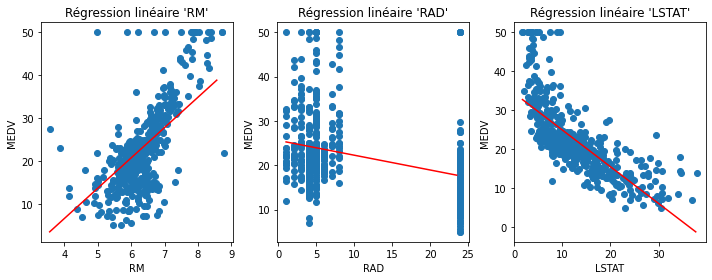

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

for i in range(len(single_vars)):
	# Prepare data
	col_name = single_vars[i]
	best_model = best_models.loc[best_models['independant var'] == col_name]
	b = best_model['b'].values[0]
	m = best_model['m'].values[0]

	# Config display graph
	ax[i].set_title(f"Régression linéaire '{col_name}'")
	ax[i].set_xlabel(col_name)
	ax[i].set_ylabel('MEDV')

	# Scatter independant var
	ax[i].scatter(boston_df[col_name], boston_df['MEDV'])

	# Draw prediction line
	x = np.arange(boston_df[col_name].min(), boston_df[col_name].max(), 0.5)
	ax[i].plot(x, m*x + b, 'r')

plt.tight_layout()
plt.show()

Pour les variables RM et LSTAT, la régression linéaire a une performance acceptable.  
Pour la variable RAD, une prédiction par régression linéraire n'est pas très pertinente au vu de la distribution des données.  
C'est d'ailleur pour cela que l'on a un mauvais R2 pour la variable RAD.  
  
Pour prédire au mieux la valeur de MEDV, nous avons utilisé une régression linéaire sur LSTAT avec 3000 epochs et un learning rate de 0.008.

# 2. Régression linéaire multiple

### 1) Utilisez la bibliothèque sklearn pour entraîner un modèle de régression linéaire multiple qui exploite plusieurs variables indépendantes (p.ex. RM et LSTAT) de la base de données « Boston Housing dataset ».

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

mult_vars = [['RM', 'LSTAT'], ['ZN', 'TAX'], ['ZN', 'LSTAT', 'RM', 'TAX'], ['RAD', 'DIS']]
results_mult = pd.DataFrame(columns=['independant vars', 'R2', 'actual', 'predicted'])

for vars in mult_vars:
	print(f"\nStarting linear regression with dependant vars: {vars}")
	
	# Select data
	X = boston_df.drop('MEDV', axis=1)[vars]
	Y = boston_df['MEDV']

	# Split the dataset
	X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

	# Train the model
	lm = LinearRegression()
	lm.fit(X_train, Y_train)

	# Compute and store results
	Y_pred = lm.predict(X_test)
	results_mult.loc[len(results_mult)] = [vars, None, Y_test, Y_pred]



Starting linear regression with dependant vars: ['RM', 'LSTAT']

Starting linear regression with dependant vars: ['ZN', 'TAX']

Starting linear regression with dependant vars: ['ZN', 'LSTAT', 'RM', 'TAX']

Starting linear regression with dependant vars: ['RAD', 'DIS']


### 2) Utilisez la bibliothèque sklearn pour préparer les données pour faire une validation hold-out ainsi que pour le calcul du coefficient de détermination (r2_score) des modèles.

In [94]:
from sklearn.metrics import r2_score

# Computet R2 for each model
for _, row in results_mult.iterrows():
	row['R2'] = r2_score(row['actual'], row['predicted'])

results_mult.sort_values(by=['R2'], kind='quicksort', ascending=False, ignore_index=True, inplace=True)

### 3) Présentez les résultats de vos expériences (points 1 et 2) avec la base de données proposée et commentez ceux-ci.

In [95]:
results_mult.drop(['actual', 'predicted'], axis=1)

,independant vars,R2
0,"[RM, LSTAT]",0.540908
1,"[ZN, LSTAT, RM, TAX]",0.495639
2,"[ZN, TAX]",0.023317
3,"[RAD, DIS]",-0.021887


Ce tableau montre les résultats de nos modèles par régression linéaire multiple, ils sont trié par score R2 décroissant.  
  
Le modèle avec le meilleur score est celui avec les variables indépendantes les plus pertinentes pour définir le prix des maisons (c.à.d. le niveau d'éducation et le nombre de pièces par logement).  
  
Juste en dessous, on a le même modèle mais utilisant 2 variables en plus on n'obtient pas un meilleur score (on remarque plus bas qu'un modèle avec uniquement ces 2 variables a un mauvais score). Plus de variable ne donne  pas nécessairement un meilleur score.  
  
En dernière position on a un modèle avec 2 variables qui sont peut pertinentes pour déterminer le prix des maisons (c.à.d. l'indice d'accessibilité des avenues et la distance à un centre d'employement).  
  
Nous en concluons qu'il faut utiliser uniquement les variables les plus pertinentes pour avoir de bonne prédictions.

### 4) Générez un scatter-plot (valeur prédite, variable dépendante) et une ligne droite correspondant à l’équation valeur prédite = valeur dépendante (Note : la variable dépendante est MEDV).

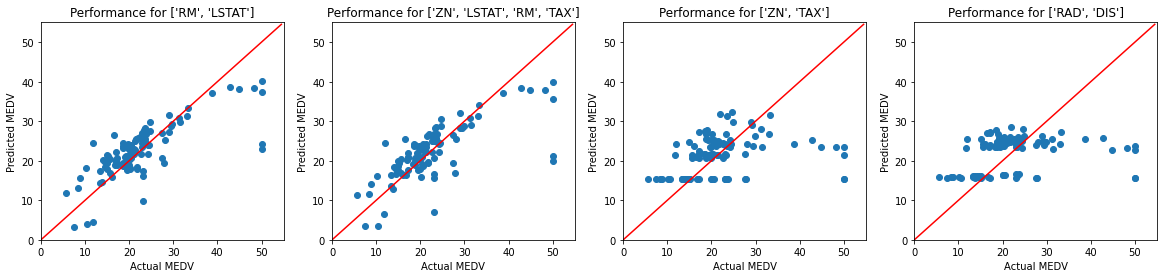

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=len(results_mult), figsize=(20, 4))

for i, row in results_mult.iterrows():
	# Draw perfect prediction line
	x = np.arange(0, 55, 0.5)
	ax[i].plot(x, x, 'r')

	# Set plot width and height
	ax[i].set_xlim(0, 55)
	ax[i].set_ylim(0, 55)

	# Scatter actual vs predicted
	ax[i].scatter(row['actual'], row['predicted'])
	ax[i].set_xlabel("Actual MEDV")
	ax[i].set_ylabel("Predicted MEDV")
	ax[i].set_title(f"Performance for {row['independant vars']}")

plt.show()